## Let's solve a classification problem on kaggle 

**problem :** [StumbleUpon Evergreen Classification Challenge]("https://www.kaggle.com/c/stumbleupon/overview")

## Import Libraries :

In [1311]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
import seaborn as sns
import re
from urllib.parse import urlparse

## Data Loading : 

In [1312]:
data = pd.read_csv('train.tsv',sep='\t')
data.sample(2).T

,7036,6845
url,http://www.naturalnews.com/022107.html,http://www.morethanamountfull.com/2011/07/oh-s...
urlid,4227,5376
boilerplate,"{""title"":""How the Cancer Industry Controls Wom...","{""title"":""More Than A Mount Full "",""body"":"" "",..."
alchemy_category,health,?
alchemy_category_score,0.666767,?
avglinksize,3.029412,6.0
commonlinkratio_1,0.546584,0.0
commonlinkratio_2,0.273292,0.0
commonlinkratio_3,0.167702,0.0
commonlinkratio_4,0.099379,0.0


## Data Exploration and cleaning :

In [1313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             7395 non-null   object 
 1   urlid                           7395 non-null   int64  
 2   boilerplate                     7395 non-null   object 
 3   alchemy_category                7395 non-null   object 
 4   alchemy_category_score          7395 non-null   object 
 5   avglinksize                     7395 non-null   float64
 6   commonlinkratio_1               7395 non-null   float64
 7   commonlinkratio_2               7395 non-null   float64
 8   commonlinkratio_3               7395 non-null   float64
 9   commonlinkratio_4               7395 non-null   float64
 10  compression_ratio               7395 non-null   float64
 11  embed_ratio                     7395 non-null   float64
 12  framebased                      73

### Column Summary :

In [1314]:
def print_column_summay(data):
    n , _ = data.shape
    name = []
    dtype = []
    unique_values_conut = []
    missing_value = []
    for column in data.columns:
        # print(column) 
        name.append(column)
        # print(str(data[column].dtype))
        data_type = str(data[column].dtype)
        dtype.append(str(data[column].dtype))
        if(data_type=="float64"):
            unique_values_conut.append("")
        else:
            unique_values_conut.append(str(data[column].nunique()))  
        missing_value.append(f" {round(data[column].isnull().sum() / n,2)*100} %")
    
    summary = {
        "Name":name,
        "Type":dtype,
        "Unique Values count":unique_values_conut,
        "Missing Values":missing_value
    }
    summary_table = pd.DataFrame(summary)
    return summary_table

print_column_summay(data)

,Name,Type,Unique Values count,Missing Values
0,url,object,7395,0.0 %
1,urlid,int64,7395,0.0 %
2,boilerplate,object,7394,0.0 %
3,alchemy_category,object,14,0.0 %
4,alchemy_category_score,object,4806,0.0 %
5,avglinksize,float64,,0.0 %
6,commonlinkratio_1,float64,,0.0 %
7,commonlinkratio_2,float64,,0.0 %
8,commonlinkratio_3,float64,,0.0 %
9,commonlinkratio_4,float64,,0.0 %


### Duplicated Values :

In [1315]:
print("Number of Duplicated Values : ",data.duplicated().sum())

Number of Duplicated Values :  0


## Feature Engineering and EDA

### **URL**

In [1316]:
indexs = np.random.randint(0,375,10)
for i in indexs:
    print(i , data.iloc[i].url)

# web site , domaine (.com , .uk , .fr) using regex :

114 http://gags.net/cute/baby-gorilla-tries-to-act-tough-video_68dcc5517.html
298 http://boingboing.net/2012/08/13/dolphins-befriend-an-underwate.html
110 http://metronews.ca/health/567951/how-to-make-your-own-all-natural-friendly-food-dyes/
369 http://www.pennlive.com/midstate/index.ssf/2012/07/ncaa_decision_on_penn_state.html
16 http://theawesomer.com/liquid-mountaineering/38622/
173 http://www.hacktheday.com/brain-boost-trivial-tips-to-start-boosting-your-iq/
154 http://www.keepingthecastle.com/50-awesome-crockpot-recipes-to-keep-you-warm-and-full/
128 http://www.aarpmagazine.org/health/stay_thin.html
231 http://www.lfgcomic.com/page/267
312 http://3kidsandus.com/red-velvet-rice-krispies-treats-hearts-for-valentines-day/


In [1317]:
def get_WebsiteName_Domaine(url,wich="w"):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    site_name = domain.replace("www.", "").split('.')[0]
    patter_domaine = r'\.[a-z]+(?=\/|$)'
    match_domaine = re.search(patter_domaine,url)
    if site_name and wich=="w":
        return site_name
    elif match_domaine and wich=="d":
        return match_domaine.group(0)

data["web site"] = data['url'].apply(get_WebsiteName_Domaine)
data["domaine"] = data['url'].apply(get_WebsiteName_Domaine,wich="d")


In [1318]:
data["domaine"].value_counts()[:10].to_frame().style.background_gradient()

,count
domaine,
.com,6298
.net,301
.uk,265
.org,244
.ca,45
.au,39
.info,34
.edu,17
.de,16


In [1319]:
data["web site"].value_counts()[:10].to_frame().style.background_gradient()

,count
web site,
insidershealth,143
sportsillustrated,109
huffingtonpost,99
allrecipes,96
bleacherreport,86
blogs,85
youtube,85
ivillage,59
foodnetwork,57


In [1320]:
print_column_summay(data)

,Name,Type,Unique Values count,Missing Values
0,url,object,7395,0.0 %
1,urlid,int64,7395,0.0 %
2,boilerplate,object,7394,0.0 %
3,alchemy_category,object,14,0.0 %
4,alchemy_category_score,object,4806,0.0 %
5,avglinksize,float64,,0.0 %
6,commonlinkratio_1,float64,,0.0 %
7,commonlinkratio_2,float64,,0.0 %
8,commonlinkratio_3,float64,,0.0 %
9,commonlinkratio_4,float64,,0.0 %


In [1321]:
data_filtered = data.loc[:,['url','web site','domaine']]
data_filtered.sample(12).T 

,3244,115,745,2293,11,6370,4811,659,7079,759,2268,5457
url,http://www.bakerella.com/its-no-sham%e2%80%a6t...,http://news.bbc.co.uk/2/hi/uk_news/346879.stm,http://www.planweddingonline.com/?p=380,http://stressedspelledbackward.blogspot.com/,http://www.midwestsportsfans.com/2010/12/photo...,http://www.tablespoon.com/recipes/pizza-pinwhe...,http://www.wimp.com/touchableholography/,http://www.foodnetwork.com/recipes/cola-barbec...,http://www.epicurious.com/recipes/food/views/T...,http://www.williams-sonoma.com/products/star-w...,http://humus101.com/EN/category/recipes/,http://www.inerikaskitchen.com/
web site,bakerella,news,planweddingonline,stressedspelledbackward,midwestsportsfans,tablespoon,wimp,foodnetwork,epicurious,williams-sonoma,humus101,inerikaskitchen
domaine,.com,.uk,.com,.com,.com,.com,.com,.com,.com,.com,.com,.com


### **urlid :**

In [1322]:
droped_columns = []
droped_columns.append('urlid')

### **boilerplate :**

In [1323]:
indexs = np.random.randint(0,375,10)
for i in indexs:
    print(i , data.iloc[i].boilerplate)


104 {"title":"breakfast blogger Blog Archive Bacon Pancakes 2 ","body":"Are you a self destructive kind of person Willing to take health risks for the sake of something tasty Looking for new and inventive ways to use up old bacon fat Got a vendetta against your heart and want to make it PAY Well I have a breakfast goodie for you Behold the wonder that is bacon pancakes Fry yourself up some of your favorite bacon the more the merrier When your bacon is nice and golden crisp remove the bacon but leave the fat in the pan Next whip yourself up some of your favorite pancake batter homemade or any of your fav insta mixes I prefer Krusteze myself will do Be sure to make it a little runny so it can be drizzled Spread the fat evenly all over your pan then drizzle your pancake batter all over Watch in amazement as the hot bacon fat magically disappears and your batter becomes bubbly and golden Flip I have no advice as to how to flip this crunchy mess just take your time Tongs help When done remo

In [1324]:
import json
def extract_title_body_lenght(data):
    boilerplatedf = data["boilerplate"].apply(json.loads)
    boilerplatedf = pd.DataFrame(boilerplatedf.tolist())
    data['boilerplate title'] = boilerplatedf['title']
    data['boilerplate body'] = boilerplatedf['body']
    data['boilerplate title'] = data['boilerplate title'].fillna('')
    data['boilerplate body'] = data['boilerplate body'].fillna('')
    data['boilerplate title lenght'] = data["boilerplate title"].apply(lambda x : len(x))
    data['boilerplate body lenght'] = data["boilerplate body"].apply(lambda x : len(x))
    del boilerplatedf
    return data

In [1325]:
data = extract_title_body_lenght(data)
data.sample(2).T

,3532,573
url,http://www.southernliving.com/food/holidays-oc...,http://www.techieapps.com/what-you-should-know...
urlid,2085,4969
boilerplate,"{""title"":""View All Photos view all photos < 30...","{""title"":""What You Should Know About iPhone Ap..."
alchemy_category,culture_politics,computer_internet
alchemy_category_score,0.62951,0.884752
avglinksize,3.060606,2.215827
commonlinkratio_1,0.602339,0.590278
commonlinkratio_2,0.327485,0.229167
commonlinkratio_3,0.099415,0.131944
commonlinkratio_4,0.017544,0.076389


<Axes: title={'center': 'Average Boilerplate title Length of Evergreen vs Non Evergreen Label'}, ylabel='label'>

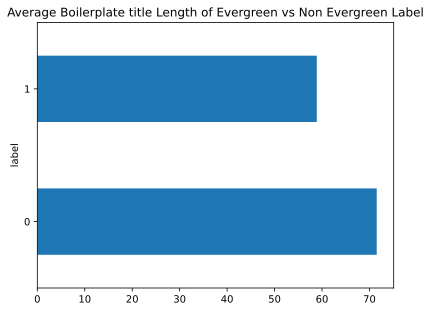

In [1326]:
data.groupby("label")["boilerplate title lenght"].mean().plot(kind='barh',title="Average Boilerplate title Length of Evergreen vs Non Evergreen Label")

<Axes: title={'center': 'Average Boilerplate body Length of Evergreen vs Non Evergreen'}, ylabel='label'>

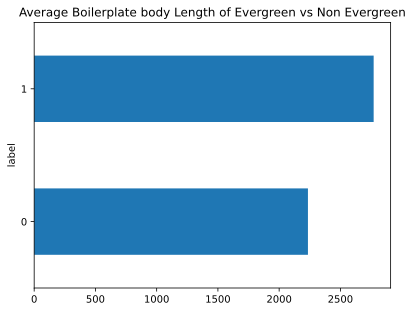

In [1327]:
data.groupby("label")["boilerplate body lenght"].mean().plot(kind='barh',title="Average Boilerplate body Length of Evergreen vs Non Evergreen")

### **alchemy category**:

In [1328]:
data['alchemy_category'].value_counts().to_frame().style.background_gradient()

,count
alchemy_category,
?,2342
recreation,1229
arts_entertainment,941
business,880
health,506
sports,380
culture_politics,343
computer_internet,296
science_technology,289


In [1329]:
data.groupby("alchemy_category")["label"].mean().sort_values().to_frame().style.background_gradient()

,label
alchemy_category,
weather,0.000000
sports,0.205263
computer_internet,0.246622
unknown,0.333333
gaming,0.368421
arts_entertainment,0.371945
religion,0.416667
law_crime,0.419355
science_technology,0.456747


In [1330]:
data.groupby('alchemy_category').label.agg(['mean', 'count']).sort_values('count', ascending=False)

,mean,count
alchemy_category,,
?,0.502135,2342
recreation,0.684296,1229
arts_entertainment,0.371945,941
business,0.711364,880
health,0.573123,506
sports,0.205263,380
culture_politics,0.457726,343
computer_internet,0.246622,296
science_technology,0.456747,289


### **alchemy category score** : 

In [1331]:
droped_columns.append('alchemy_category_score')

### **is news:**

In [1332]:
data['is_news'].value_counts().to_frame()
data['is_news'] = data['is_news'].str.replace("?","0").astype(int)

In [1333]:
data['is_news'].value_counts().to_frame()

,count
is_news,
1,4552
0,2843


### **news_front_page:**

In [1334]:
data['news_front_page'].value_counts()
data['news_front_page'] = data['news_front_page'].str.replace("?","0").astype(int)

In [1335]:
data['news_front_page'].value_counts().to_frame()

,count
news_front_page,
0,7101
1,294


In [1336]:
droped_columns.extend(['boilerplate','url','boilerplate body','web site','boilerplate title','domaine'])

In [1337]:
data.drop(columns=droped_columns,inplace=True)

In [1338]:
print_column_summay(data)

,Name,Type,Unique Values count,Missing Values
0,alchemy_category,object,14,0.0 %
1,avglinksize,float64,,0.0 %
2,commonlinkratio_1,float64,,0.0 %
3,commonlinkratio_2,float64,,0.0 %
4,commonlinkratio_3,float64,,0.0 %
5,commonlinkratio_4,float64,,0.0 %
6,compression_ratio,float64,,0.0 %
7,embed_ratio,float64,,0.0 %
8,framebased,int64,1,0.0 %
9,frameTagRatio,float64,,0.0 %


In [1339]:
numeric_data = data.select_dtypes(include=["number"])

numeric_data.corr()

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,...,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,boilerplate title lenght,boilerplate body lenght
avglinksize,1.000000,0.120467,0.161769,0.174554,0.134527,-0.003578,0.005254,NaN,-0.049270,-0.002046,...,0.122550,-0.015670,-0.010982,0.000360,-0.033890,0.006089,0.035393,0.006172,-0.019468,0.016601
commonlinkratio_1,0.120467,1.000000,0.808047,0.560584,0.388801,-0.017878,0.005280,NaN,-0.294860,0.006790,...,0.257200,0.026324,0.193914,0.317293,0.144354,-0.078026,-0.035019,0.083364,0.036185,0.117733
commonlinkratio_2,0.161769,0.808047,1.000000,0.758330,0.555148,-0.032460,0.019387,NaN,-0.259222,0.000263,...,0.257594,0.047111,0.177785,0.311492,0.096940,-0.079485,-0.027888,0.083488,0.007181,0.124200
commonlinkratio_3,0.174554,0.560584,0.758330,1.000000,0.850604,-0.016188,0.007578,NaN,-0.218559,-0.031097,...,0.109654,0.040057,0.264022,0.283924,0.049203,-0.008652,-0.008599,0.105964,-0.044878,0.136849
commonlinkratio_4,0.134527,0.388801,0.555148,0.850604,1.000000,-0.020415,0.005473,NaN,-0.178064,-0.052519,...,0.059223,0.041393,0.162883,0.233898,0.026384,0.036387,-0.013507,0.080464,-0.038163,0.116602
compression_ratio,-0.003578,-0.017878,-0.032460,-0.016188,-0.020415,1.000000,-0.889345,NaN,0.159335,0.027657,...,0.146470,-0.014765,-0.064163,-0.055388,-0.042614,-0.033772,0.364122,-0.059737,-0.318022,-0.244643
embed_ratio,0.005254,0.005280,0.019387,0.007578,0.005473,-0.889345,1.000000,NaN,-0.130753,-0.026473,...,-0.108476,0.008855,0.046484,0.042942,0.043343,0.037361,-0.342206,0.039536,0.292144,0.230184
framebased,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frameTagRatio,-0.049270,-0.294860,-0.259222,-0.218559,-0.178064,0.159335,-0.130753,NaN,1.000000,0.010193,...,0.158874,-0.085953,-0.303682,-0.362491,0.049330,-0.094557,0.033663,-0.187762,0.025708,-0.190246
hasDomainLink,-0.002046,0.006790,0.000263,-0.031097,-0.052519,0.027657,-0.026473,NaN,0.010193,1.000000,...,0.022583,-0.025167,-0.017361,0.013678,0.058085,0.051330,0.008718,-0.004863,0.007011,-0.019640


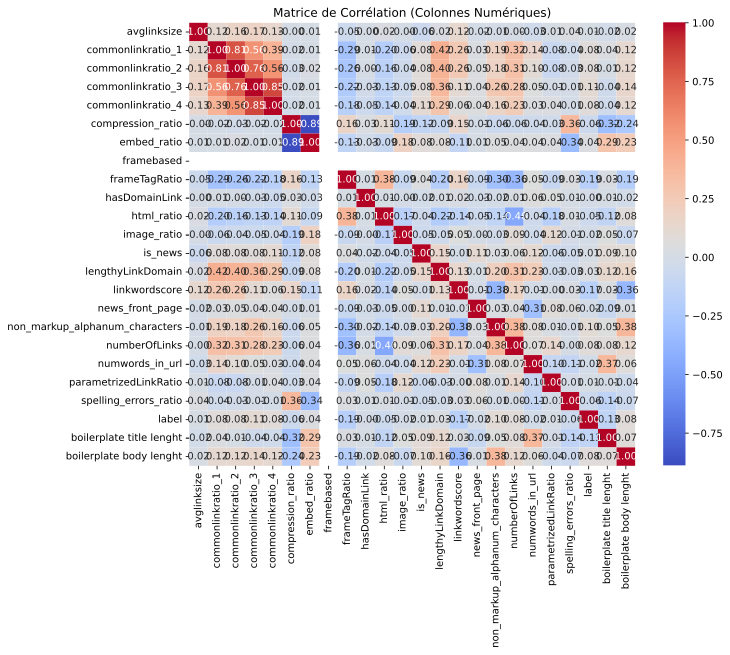

In [1340]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de Corrélation (Colonnes Numériques)")
plt.show()

In [1341]:
object_data = data.select_dtypes(include=["object"])
object_dummies = pd.get_dummies(object_data, drop_first=True).astype(int)
final_data = pd.concat([numeric_data, object_dummies], axis=1)

final_data.head()

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,0.090774,0,...,0,0,0,0,0,0,0,0,0,0
1,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0,0.098707,0,...,0,0,0,0,1,0,0,0,0,0
2,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0,0.072448,0,...,0,0,1,0,0,0,0,0,0,0
3,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0,0.095861,0,...,0,0,1,0,0,0,0,0,0,0
4,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0,0.024908,0,...,0,0,0,0,0,0,0,1,0,0


## Modeling : 

In [1342]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report ,accuracy_score

In [1343]:
X = final_data.drop(columns=['label'])
y = final_data['label']



In [1344]:
X

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,0.090774,0,...,0,0,0,0,0,0,0,0,0,0
1,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0,0.098707,0,...,0,0,0,0,1,0,0,0,0,0
2,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0,0.072448,0,...,0,0,1,0,0,0,0,0,0,0
3,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0,0.095861,0,...,0,0,1,0,0,0,0,0,0,0
4,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0,0.024908,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,3.010526,0.474747,0.222222,0.191919,0.191919,0.474273,0.0,0,0.177043,0,...,0,0,0,0,0,0,0,0,0,0
7391,2.208054,0.483333,0.246667,0.036667,0.026667,0.558184,0.0,0,0.057377,0,...,1,0,0,0,0,0,0,0,0,0
7392,2.000000,0.315789,0.171053,0.105263,0.052632,0.692529,0.0,0,0.124122,0,...,0,0,0,0,1,0,0,0,0,0
7393,1.026316,0.210526,0.052632,0.000000,0.000000,21.000000,-1.0,0,0.097778,0,...,0,0,0,0,0,0,0,0,0,0


In [1345]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train , X_test , y_train ,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

model = LogisticRegression(solver='lbfgs', random_state=42)

model.fit(X_train,y_train)


LogisticRegression(random_state=42)

In [1347]:
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       730
           1       0.66      0.71      0.68       749

    accuracy                           0.66      1479
   macro avg       0.67      0.66      0.66      1479
weighted avg       0.67      0.66      0.66      1479



In [1348]:
data_test = pd.read_csv('test.tsv',sep='\t')
data_test["web site"] = data_test['url'].apply(get_WebsiteName_Domaine)
data_test["domaine"] = data_test['url'].apply(get_WebsiteName_Domaine,wich="d")
data_test['is_news'] = data_test['is_news'].str.replace("?","0").astype(int)
data_test['news_front_page'] = data_test['news_front_page'].str.replace("?","0").astype(int)
data_test = extract_title_body_lenght(data_test)

droped_columns.pop(0)
data_test.drop(columns=droped_columns,inplace=True)
print_column_summay(data_test)

,Name,Type,Unique Values count,Missing Values
0,urlid,int64,3171,0.0 %
1,alchemy_category,object,12,0.0 %
2,avglinksize,float64,,0.0 %
3,commonlinkratio_1,float64,,0.0 %
4,commonlinkratio_2,float64,,0.0 %
5,commonlinkratio_3,float64,,0.0 %
6,commonlinkratio_4,float64,,0.0 %
7,compression_ratio,float64,,0.0 %
8,embed_ratio,float64,,0.0 %
9,framebased,int64,1,0.0 %


In [1350]:
numeric_data = data_test.select_dtypes(include=["number"])
object_data = data_test.select_dtypes(include=["object"])
object_dummies = pd.get_dummies(object_data, drop_first=True).astype(int)
final_test = pd.concat([numeric_data, object_dummies], axis=1)
print(final_test.columns.to_list())
print(final_data.columns.to_list())
final_ft = final_test[final_test.drop('urlid', axis=1).columns]


['urlid', 'avglinksize', 'commonlinkratio_1', 'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4', 'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio', 'hasDomainLink', 'html_ratio', 'image_ratio', 'is_news', 'lengthyLinkDomain', 'linkwordscore', 'news_front_page', 'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url', 'parametrizedLinkRatio', 'spelling_errors_ratio', 'boilerplate title lenght', 'boilerplate body lenght', 'alchemy_category_arts_entertainment', 'alchemy_category_business', 'alchemy_category_computer_internet', 'alchemy_category_culture_politics', 'alchemy_category_gaming', 'alchemy_category_health', 'alchemy_category_law_crime', 'alchemy_category_recreation', 'alchemy_category_religion', 'alchemy_category_science_technology', 'alchemy_category_sports']
['avglinksize', 'commonlinkratio_1', 'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4', 'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio', 'hasDomainLink'

In [1352]:
sub_model = RandomForestClassifier()
sub_model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
predictions = model.predict(final_ft)

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 34 features, but RandomForestClassifier is expecting 36 features as input.

In [ ]:
final_data.isnull().sum()

urlid                                  0
avglinksize                            0
commonlinkratio_1                      0
commonlinkratio_2                      0
commonlinkratio_3                      0
commonlinkratio_4                      0
compression_ratio                      0
embed_ratio                            0
framebased                             0
frameTagRatio                          0
hasDomainLink                          0
html_ratio                             0
image_ratio                            0
is_news                                0
lengthyLinkDomain                      0
linkwordscore                          0
news_front_page                        0
non_markup_alphanum_characters         0
numberOfLinks                          0
numwords_in_url                        0
parametrizedLinkRatio                  0
spelling_errors_ratio                  0
boilerplate title lenght               0
boilerplate body lenght                0
alchemy_category